Task A: Data Cleaning

● A1. Handle Missing Data: Identify and deal with missing values (remove or impute).

In [1]:
import pandas as pd 
df = pd.read_csv('smt.csv')
print(df.head())
# Count of missing values in each column
print(df.isnull().sum())


   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

● A2. Remove Duplicates: Find and eliminate any duplicate rows.

A3. Fix Inconsistencies: Standardize inconsistent data entries (e.g., case issues in
categorical columns).

In [2]:
print(df.columns)
# # # c = df['Unnamed: 0.1'] == df['Unnamed: 0']
# # # print(c)
# # # print(c.unique())

df.drop('Unnamed: 0.1',axis=1, inplace= True)
df.drop('Unnamed: 0',axis=1, inplace= True)

# # df.rename(columns={'Unnamed: 0':'sr.'}, inplace=True)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')


In [3]:
df.columns = df.columns.str.lower()
df['country'].unique()
df.columns=df.columns.str.strip()
print(df.head())

                                                text    sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             timestamp            user     platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     hashtags  retweets  likes       country  \
0   #Nature #Park                                  15.0   30.0     USA         
1   #Traffic #Morning                               5.0   10.0     Canada      
2   #Fitness #

In [4]:
cols_to_strip = ['platform', 'country', 'user','sentiment','hashtags']
df[cols_to_strip] = df[cols_to_strip].apply(lambda x: x.str.strip())


In [5]:
duplicates = df[df.duplicated()]
print("Duplicate rows:\n", duplicates)
print("Number of duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicate rows:
                                                   text      sentiment  \
279   Proudly scaling the peaks of achievement, a m...          Proud   
280   Embraced by the hopeful dawn, a gardener sowi...        Hopeful   
281   A playful escapade in the carnival of life, c...        Playful   
282   Floating on clouds of inspiration, an artist ...       Inspired   
283   Navigating the river of contentment, a serene...    Contentment   
284   With empathy as a lantern, wandering through ...     Empathetic   
285   A free spirit soaring on the wings of dreams,...  Free-spirited   
286   Bathed in the golden hues of gratefulness, a ...       Grateful   
287   Confident strides in the dance of life, a bal...      Confident   
288   Hopeful whispers of wind, carrying the promis...        Hopeful   
289   Playfully juggling responsibilities, a circus...        Playful   
290   Whispering tales of inspiration to the stars,...       Inspired   
291   Charting a course through th

In [6]:
#reset index
# df.reset_index(drop=True, inplace=True)
# df['sr.'] = df.index + 1
# print(df.head())
# df = df[['sr.'] + [col for col in df.columns if col != 'sr.']]
# df = df.drop('sr.',axis=1)


Task B: Exploratory Data Analysis (EDA)

● B1. Understand the Data: Review the first few rows and check data types.

In [7]:

#EDA
# text column sorted
# df.sort_values(by='text',ascending=True)
# df.sort_values(by='sentiment',ascending=True)
# df['sentiment'].nunique()
# df.info()
# df['text'].nunique()#707
# df[df['text'].duplicated(keep=False)].sort_values(by='text',ascending=True)
# df[df['hashtags'].duplicated(keep=False)].sort_values(by='hashtags',ascending=True)

# # Convert the column to datetime (if not already)
# df['timestamp'] = pd.to_datetime(df['timestamp'])

# # Sort by timestamp (earliest to latest)
# df.head(10).sort_values(by='timestamp', ascending=True)

# print(df.dtypes)


B2. Data Distribution: Visualize the distribution of numerical columns (e.g.,
histograms or boxplots).

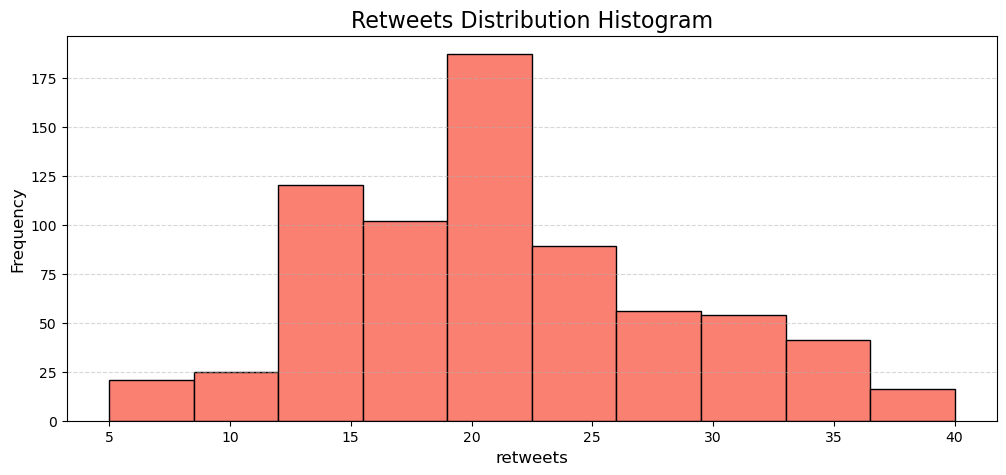

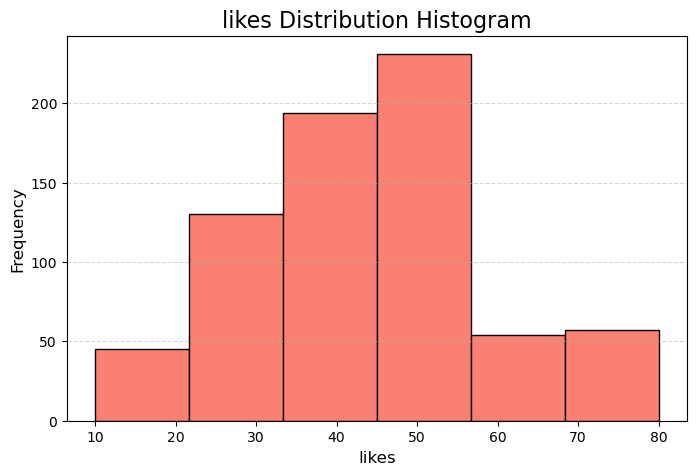

In [8]:
import matplotlib.pyplot as plt
# Create histogram
plt.figure(figsize=(12, 5))
plt.hist(df['retweets'], bins=10, color='salmon', edgecolor='black')

# Add titles and labels
plt.title('Retweets Distribution Histogram', fontsize=16)
plt.xlabel('retweets', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add grid and show plot
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Create histogram
plt.figure(figsize=(8, 5))
plt.hist(df['likes'], bins=6, color='salmon', edgecolor='black')

# Add titles and labels
plt.title('likes Distribution Histogram', fontsize=16)
plt.xlabel('likes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add grid and show plot
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

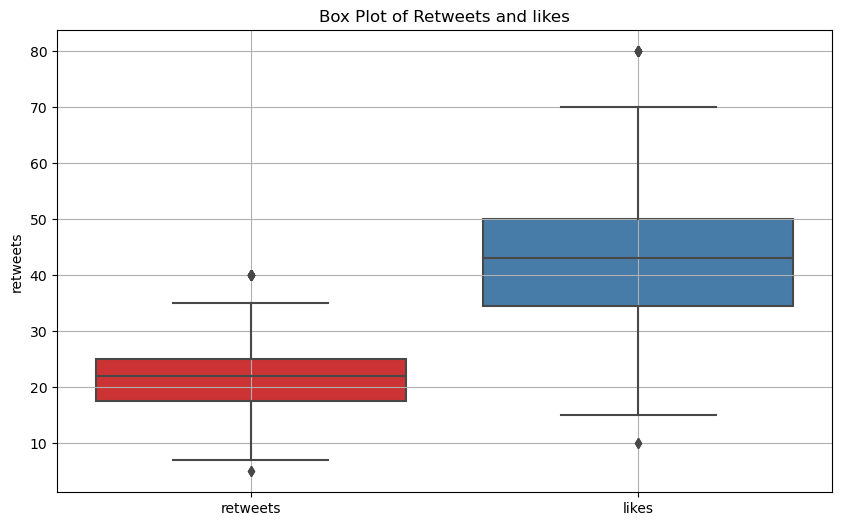

In [9]:
import seaborn as sns
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(df[['retweets', 'likes']], palette="Set1")
# Add labels and title
plt.title('Box Plot of Retweets and likes')
plt.ylabel('retweets')
plt.grid(True)
plt.show()

● B4. Categorical Data Exploration: Visualize frequencies of categorical columns
(e.g., bar plots).

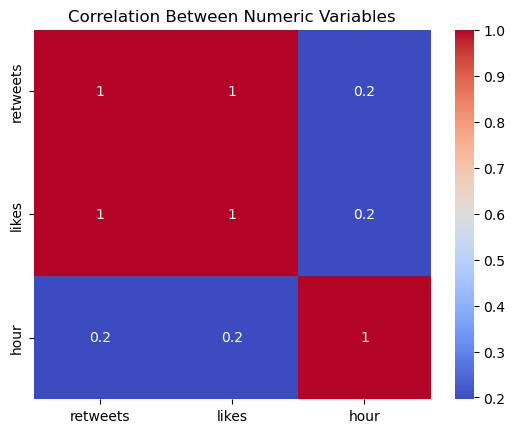

In [10]:
sns.heatmap(df[['retweets', 'likes', 'hour']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Variables')
plt.show()

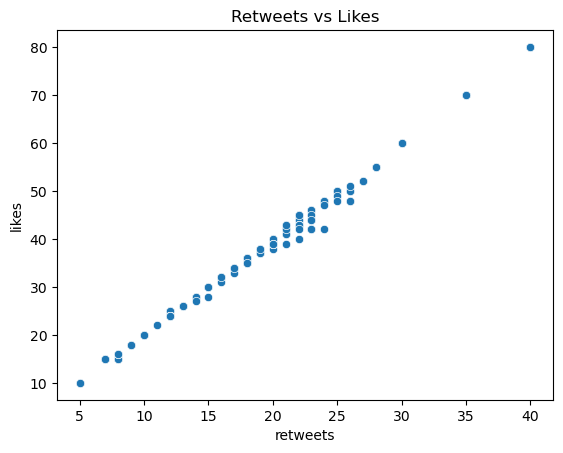

In [11]:
sns.scatterplot(data=df, x='retweets', y='likes')
plt.title('Retweets vs Likes')
plt.show()

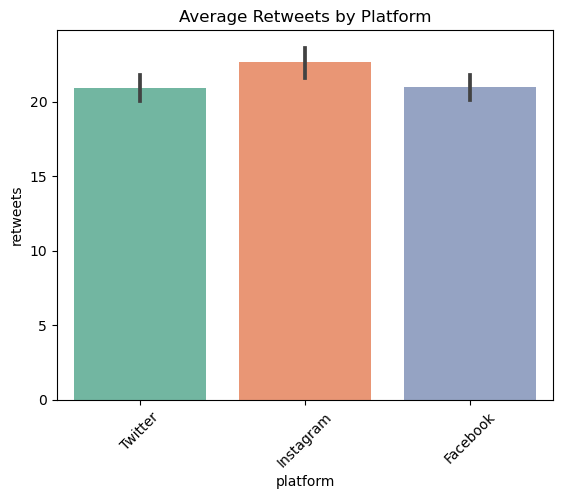

In [12]:
df['platform'] = df['platform'].str.strip()  # Removes leading/trailing whitespace
sns.barplot(data=df, x='platform', y='retweets', estimator='mean', palette='Set2')
plt.title('Average Retweets by Platform')
plt.xticks(rotation=45)
plt.show()

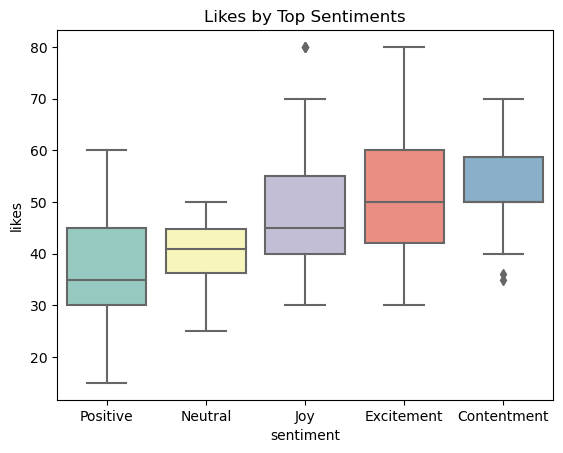

In [13]:
top_sentiments = df['sentiment'].value_counts().head(5).index
filtered_df = df[df['sentiment'].isin(top_sentiments)]

sns.boxplot(data=filtered_df, x='sentiment', y='likes', palette='Set3')
plt.title('Likes by Top Sentiments')
plt.show()

B4. Categorical Data Exploration: Visualize frequencies of categorical columns
(e.g., bar plots).

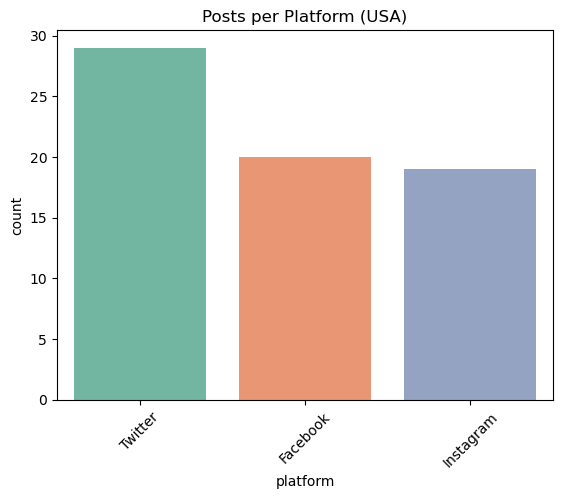

In [14]:
filtered_df = df[df['country'] == 'India']

sns.countplot(data=filtered_df, x='platform', palette='Set2')
plt.title('Posts per Platform (USA)')
plt.xticks(rotation=45)
plt.show()

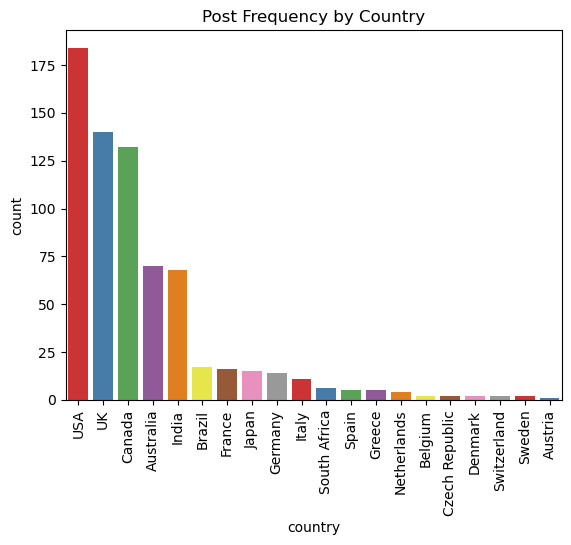

In [15]:
sns.countplot(data=df, x='country', order=df['country'].value_counts().head(20).index, palette='Set1')
plt.title('Post Frequency by Country')
plt.xticks(rotation=90)
plt.show()

Task C: Data Preprocessing for Modeling

● C1. Feature Engineering: Create new features if relevant (e.g., categorizing age).

In [17]:
df['weekday'] = pd.to_datetime(df['timestamp']).dt.day_name()
df['text_length'] = df['text'].str.len()
df['hashtag_count'] = df['hashtags'].str.count('#')
# Create 'is_weekend' column: 1 if Saturday (5) or Sunday (6), else 0
# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['is_weekend'] = df['timestamp'].dt.dayofweek.isin([5, 6]).astype(int)

# Preview the result
print(df.head())

                                                text sentiment  \
0   Enjoying a beautiful day at the park!        ...  Positive   
1   Traffic was terrible this morning.           ...  Negative   
2   Just finished an amazing workout! 💪          ...  Positive   
3   Excited about the upcoming weekend getaway!  ...  Positive   
4   Trying out a new recipe for dinner tonight.  ...   Neutral   

            timestamp        user   platform            hashtags  retweets  \
0 2023-01-15 12:30:00     User123    Twitter       #nature #park      15.0   
1 2023-01-15 08:45:00   CommuterX    Twitter   #traffic #morning       5.0   
2 2023-01-15 15:45:00  FitnessFan  Instagram   #fitness #workout      20.0   
3 2023-01-15 18:20:00  AdventureX   Facebook  #travel #adventure       8.0   
4 2023-01-15 19:55:00    ChefCook  Instagram      #cooking #food      12.0   

   likes    country  year  month  day  hour weekday  text_length  \
0   30.0        USA  2023      1   15    12  Sunday           52  

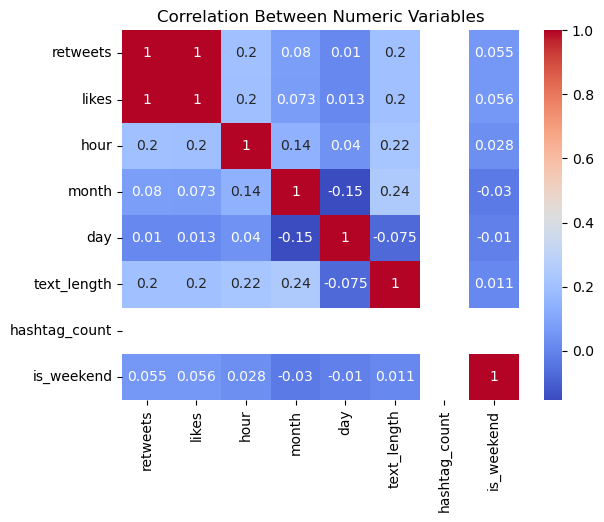

In [18]:
sns.heatmap(df[['retweets', 'likes', 'hour','month','day', 'text_length','hashtag_count','is_weekend']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Variables')
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
cols_to_normalize = ['likes', 'retweets', 'text_length']
scaler_z = StandardScaler()
df_z_scaled = df.copy()
df_z_scaled[cols_to_normalize] = scaler_z.fit_transform(df[cols_to_normalize])

# scaler_minmax = MinMaxScaler()
# df_minmax_scaled = df.copy()
# df_minmax_scaled[cols_to_normalize] = scaler_minmax.fit_transform(df[cols_to_normalize])

print(df_z_scaled.head())

                                                text sentiment  \
0   Enjoying a beautiful day at the park!        ...  Positive   
1   Traffic was terrible this morning.           ...  Negative   
2   Just finished an amazing workout! 💪          ...  Positive   
3   Excited about the upcoming weekend getaway!  ...  Positive   
4   Trying out a new recipe for dinner tonight.  ...   Neutral   

            timestamp        user   platform            hashtags  retweets  \
0 2023-01-15 12:30:00     User123    Twitter       #nature #park -0.917471   
1 2023-01-15 08:45:00   CommuterX    Twitter   #traffic #morning -2.321824   
2 2023-01-15 15:45:00  FitnessFan  Instagram   #fitness #workout -0.215295   
3 2023-01-15 18:20:00  AdventureX   Facebook  #travel #adventure -1.900518   
4 2023-01-15 19:55:00    ChefCook  Instagram      #cooking #food -1.338777   

      likes    country  year  month  day  hour weekday  text_length  \
0 -0.911361        USA  2023      1   15    12  Sunday    -1.20

Task D: Data Visualization and Dashboarding


D1. Static Visualizations using Matplotlib and Seaborn


In [20]:
#already

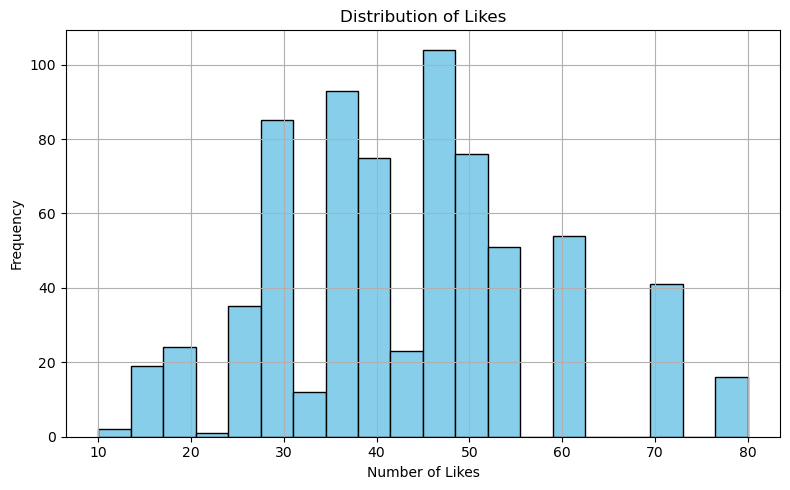

In [21]:
plt.figure(figsize=(8, 5))
plt.hist(df['likes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


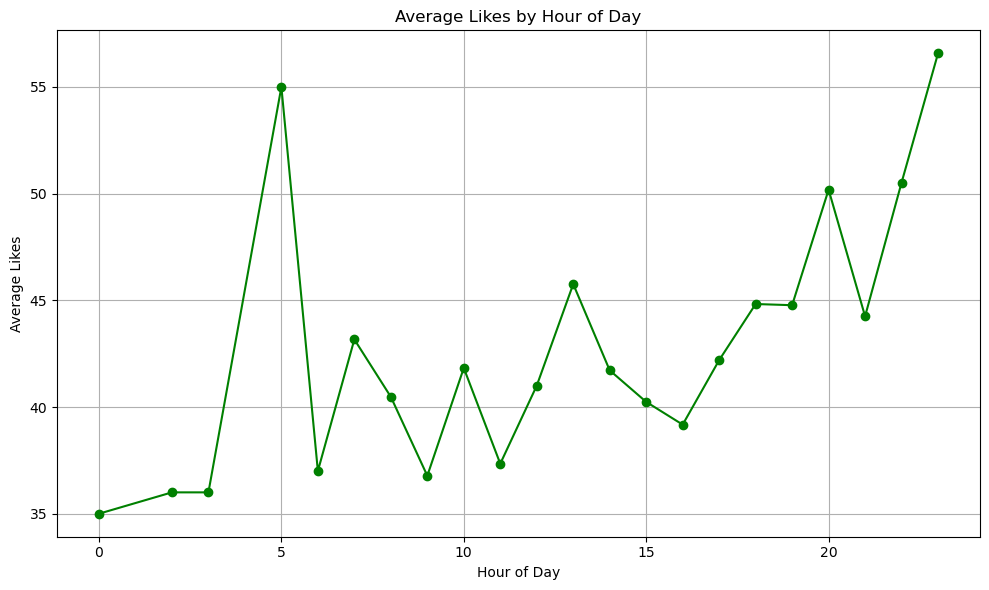

In [22]:
avg_likes_per_hour = df.groupby('hour')['likes'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_likes_per_hour.index, avg_likes_per_hour.values, marker='o', linestyle='-', color='green')
plt.title('Average Likes by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Likes')
plt.grid(True)
plt.tight_layout()
plt.show()

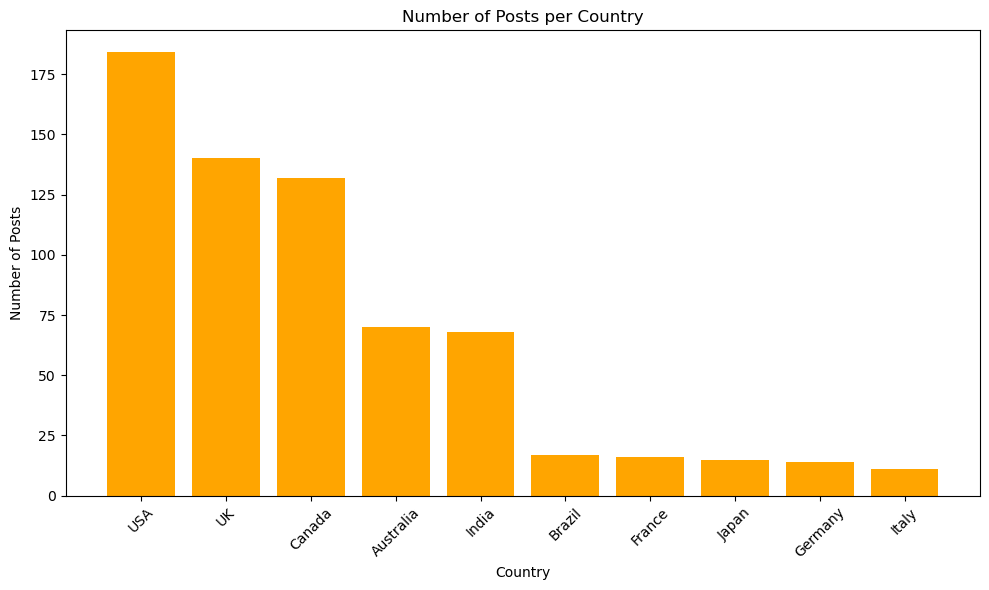

In [23]:
country_counts = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.bar(country_counts.index, country_counts.values, color='orange')
plt.title('Number of Posts per Country')
plt.xlabel('Country')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

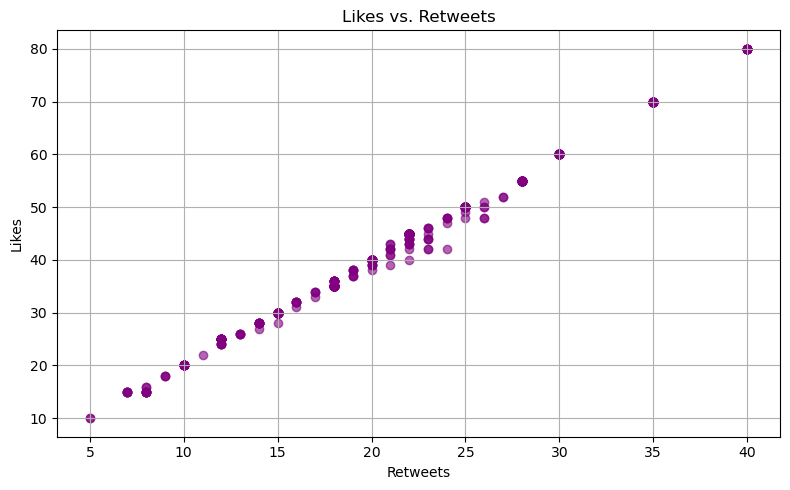

In [24]:
plt.figure(figsize=(8, 5))
plt.scatter(df['retweets'], df['likes'], alpha=0.6, color='purple')
plt.title('Likes vs. Retweets')
plt.xlabel('Retweets')
plt.ylabel('Likes')
plt.grid(True)
plt.tight_layout()
plt.show()

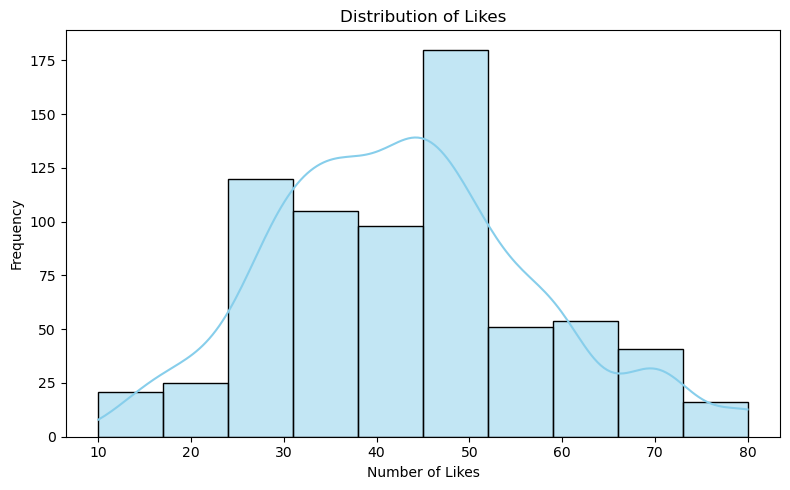

In [25]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['likes'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

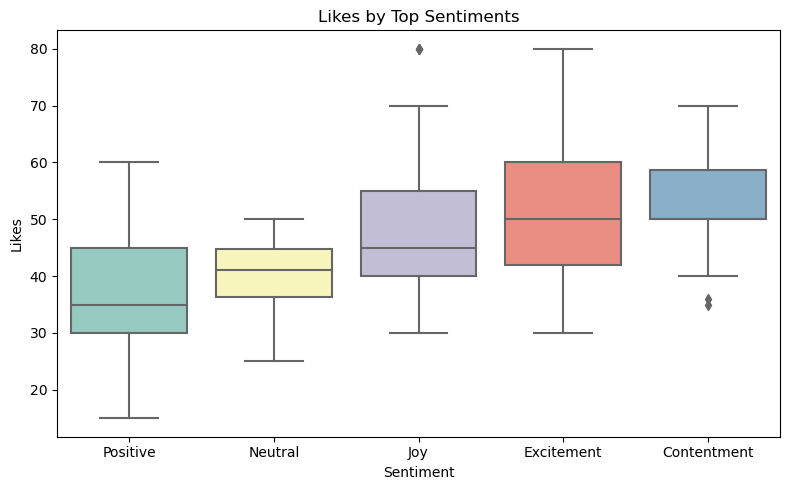

In [26]:


# Step 1: Get top 5 most frequent sentiments
top_sentiments = df['sentiment'].value_counts().nlargest(5).index

# Step 2: Filter the DataFrame
df_top_sentiments = df[df['sentiment'].isin(top_sentiments)]

# Step 3: Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='sentiment', y='likes', data=df_top_sentiments, palette='Set3')
plt.title('Likes by Top Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Likes')
plt.tight_layout()
plt.show()

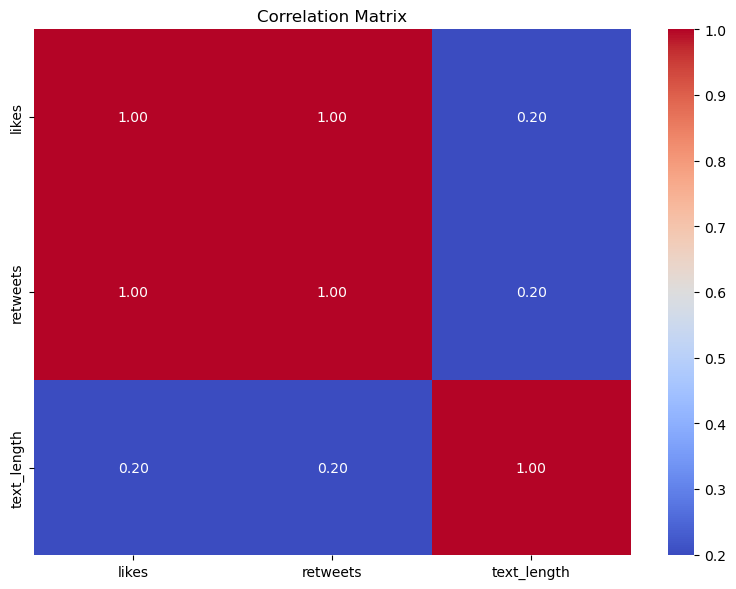

In [27]:
plt.figure(figsize=(8, 6))
corr_matrix = df[['likes', 'retweets', 'text_length']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

c:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\PC\AppData\Local\Temp\ipykernel_9384\432111799.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


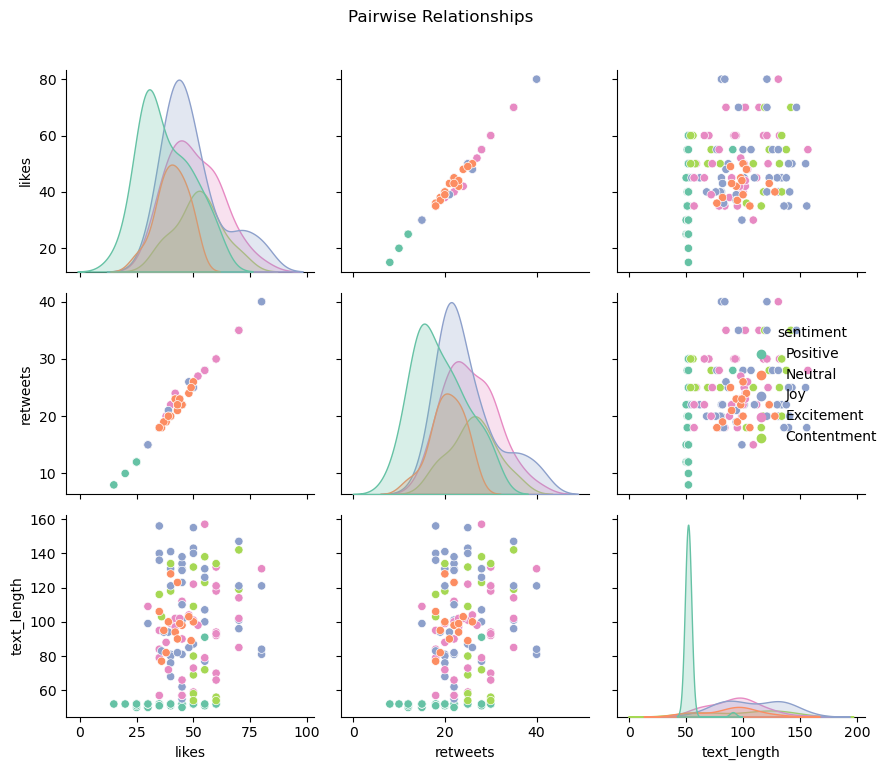

In [28]:
top_sentiments = df['sentiment'].value_counts().head(5).index
filtered_df = df[df['sentiment'].isin(top_sentiments)]

sns.pairplot(filtered_df, vars=['likes', 'retweets', 'text_length'], hue='sentiment', palette='Set2')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.tight_layout()
plt.show()

D2. Interactive Visualizations using Plotly


Use plotly.express and plotly.graph_objects to build interactive charts such as:


Interactive bar and line charts


Hoverable and zoomable scatter plots


In [29]:
import plotly.express as px

# Count the number of posts per country
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'post_count']

# Create an interactive bar chart
fig = px.bar(
    country_counts,
    x='country',
    y='post_count',
    title='Number of Posts per Country',
    labels={'post_count': 'Number of Posts'},
    hover_data={'country': True, 'post_count': True},
    color='post_count',
    color_continuous_scale='Viridis'
)

fig.update_layout(xaxis_title='Country', yaxis_title='Number of Posts')
fig.show()



In [30]:
# Calculate average likes per hour
avg_likes_per_hour = df.groupby('hour')['likes'].mean().reset_index()

# Create an interactive line chart
fig = px.line(
    avg_likes_per_hour,
    x='hour',
    y='likes',
    title='Average Likes by Hour of Day',
    labels={'likes': 'Average Likes'},
    markers=True
)

fig.update_layout(xaxis_title='Hour of Day', yaxis_title='Average Likes')
fig.show()


In [31]:
# Create an interactive scatter plot
fig = px.scatter(
    df,
    x='retweets',
    y='likes',
    color='sentiment',
    title='Likes vs. Retweets Colored by Sentiment',
    labels={'retweets': 'Number of Retweets', 'likes': 'Number of Likes'},
    hover_data=['user', 'platform', 'text']
)

fig.update_layout(xaxis_title='Retweets', yaxis_title='Likes')
fig.show()


D3. Identify Trends


Visualize time-based or group-based trends in the dataset.


Use group-by operations to summarize trends over time or categories.


Generate insights from these trends visually to guide decisions.




In [32]:
# Convert 'timestamp' to datetime if not already
df['timestamp'] = pd.to_datetime(df['timestamp'])
# Extract date from timestamp
df['date'] = df['timestamp'].dt.date

# Group by date and calculate average likes
daily_avg_likes = df.groupby('date')['likes'].mean().reset_index()


import plotly.express as px

fig = px.line(
    daily_avg_likes,
    x='date',
    y='likes',
    title='Daily Average Likes Over Time',
    labels={'likes': 'Average Likes', 'date': 'Date'},
    markers=True
)
fig.update_layout(xaxis_title='Date', yaxis_title='Average Likes')
fig.show()



In [33]:
# Group by sentiment and calculate average likes
avg_likes_sentiment = df.groupby('sentiment')['likes'].mean().reset_index()
fig = px.bar(
    avg_likes_sentiment,
    x='sentiment',
    y='likes',
    title='Average Likes by Sentiment',
    labels={'likes': 'Average Likes', 'sentiment': 'Sentiment'},
    color='sentiment'
)
fig.update_layout(xaxis_title='Sentiment', yaxis_title='Average Likes')
fig.show()


In [34]:
# Group by sentiment and calculate average likes
avg_likes_sentiment = df.groupby('sentiment')['likes'].mean().reset_index()

# Sort by 'likes' in descending order
avg_likes_sentiment = avg_likes_sentiment.sort_values(by='likes', ascending=False)

# Plotting the bar chart
import plotly.express as px
fig = px.bar(
    avg_likes_sentiment,
    x='sentiment',
    y='likes',
    title='Average Likes by Sentiment',
    labels={'likes': 'Average Likes', 'sentiment': 'Sentiment'},
    color='sentiment'
)

# Update axis titles
fig.update_layout(xaxis_title='Sentiment', yaxis_title='Average Likes')

# Show the plot
fig.show()


In [35]:
# Count number of posts per day
daily_posts = df.groupby('date').size().reset_index(name='post_count')
fig = px.line(
    daily_posts,
    x='date',
    y='post_count',
    title='Number of Posts Over Time',
    labels={'post_count': 'Number of Posts', 'date': 'Date'},
    markers=True
)
fig.update_layout(xaxis_title='Date', yaxis_title='Number of Posts')
fig.show()


In [36]:
# Extract hour from timestamp
df['hour'] = df['timestamp'].dt.hour

# Group by hour and calculate average likes
hourly_avg_likes = df.groupby('hour')['likes'].mean().reset_index()
fig = px.line(
    hourly_avg_likes,
    x='hour',
    y='likes',
    title='Average Likes by Hour of Day',
    labels={'likes': 'Average Likes', 'hour': 'Hour of Day'},
    markers=True
)
fig.update_layout(xaxis_title='Hour of Day', yaxis_title='Average Likes')
fig.show()
print(df.head(50))


                                                 text sentiment  \
0    Enjoying a beautiful day at the park!        ...  Positive   
1    Traffic was terrible this morning.           ...  Negative   
2    Just finished an amazing workout! 💪          ...  Positive   
3    Excited about the upcoming weekend getaway!  ...  Positive   
4    Trying out a new recipe for dinner tonight.  ...   Neutral   
5    Feeling grateful for the little things in lif...  Positive   
6    Rainy days call for cozy blankets and hot coc...  Positive   
7    The new movie release is a must-watch!       ...  Positive   
8    Political discussions heating up on the timel...  Negative   
9    Missing summer vibes and beach days.         ...   Neutral   
10   Just published a new blog post. Check it out!...  Positive   
11   Feeling a bit under the weather today.       ...  Negative   
12   Exploring the city's hidden gems.            ...  Positive   
13   New year, new fitness goals! 💪               ...  Positiv

In [37]:
print(df['country'].unique())
sorted_sentiments = df['platform'].value_counts().index
print(sorted_sentiments)
print(df.head(100))

['USA' 'Canada' 'UK' 'Australia' 'India' 'France' 'Brazil' 'Japan'
 'Greece' 'Germany' 'Sweden' 'Italy' 'Netherlands' 'South Africa' 'Spain'
 'Portugal' 'Switzerland' 'Austria' 'Belgium' 'Denmark' 'Czech Republic'
 'Jordan' 'Peru' 'Maldives' 'China' 'Cambodia' 'Norway' 'Colombia'
 'Ireland' 'Jamaica' 'Kenya' 'Scotland' 'Thailand']
Index(['Instagram', 'Twitter', 'Facebook'], dtype='object', name='platform')
                                                 text   sentiment  \
0    Enjoying a beautiful day at the park!        ...    Positive   
1    Traffic was terrible this morning.           ...    Negative   
2    Just finished an amazing workout! 💪          ...    Positive   
3    Excited about the upcoming weekend getaway!  ...    Positive   
4    Trying out a new recipe for dinner tonight.  ...     Neutral   
..                                                ...         ...   
95   Confusion reigns as I try to make sense of re...   Confusion   
96   Excitement building up for a surp

In [38]:
# import sys
# print(sys.executable)


# "c:\Users\PC\anaconda3\python.exe" -m pip install dash




D4. Dash Application for Web-based Interaction


Build a Dash dashboard to allow users to interact with visual data.


Include dynamic elements like dropdown filters, sliders, and interactive graphs.


Enable viewing of:


Distributions of variables


Relationships between key features


Interactive correlation analysis


Category breakdowns and trends


In [39]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output


# Initialize Dash app
app = Dash(__name__)
app.title = "Interactive Data Dashboard"

# Layout
app.layout = html.Div([
    html.H1("Interactive Data Dashboard", style={'textAlign': 'center'}),

    html.Div([
        html.Label("Select Sentiment:"),
        dcc.Dropdown(
            id='sentiment-filter',
            options=[{'label': s, 'value': s} for s in df['sentiment'].unique()],
            value=df['sentiment'].unique().tolist(),
            multi=True
        ),
    ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),

    html.Div([
        html.Label("Select Platform:"),
        dcc.Dropdown(
            id='platform-filter',
            options=[{'label': p, 'value': p} for p in df['platform'].unique()],
            value=df['platform'].unique().tolist(),
            multi=True
        ),
    ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),

    html.Div([
        html.Label("Select Hour Range:"),
        dcc.RangeSlider(
            id='hour-slider',
            min=0,
            max=23,
            value=[0, 23],
            marks={i: f'{i}:00' for i in range(0, 24, 3)},
            tooltip={"placement": "bottom", "always_visible": True}
        ),
    ], style={'width': '90%', 'padding': '20px'}),

    html.Div([dcc.Graph(id='likes-distribution')], style={'width': '48%', 'display': 'inline-block'}),
    html.Div([dcc.Graph(id='likes-vs-retweets')], style={'width': '48%', 'display': 'inline-block'}),
    html.Div([dcc.Graph(id='correlation-heatmap')], style={'width': '48%', 'display': 'inline-block'}),
    html.Div([dcc.Graph(id='posts-over-time')], style={'width': '48%', 'display': 'inline-block'}),
])

# Callbacks
@app.callback(
    Output('likes-distribution', 'figure'),
    Output('likes-vs-retweets', 'figure'),
    Output('correlation-heatmap', 'figure'),
    Output('posts-over-time', 'figure'),
    Input('sentiment-filter', 'value'),
    Input('platform-filter', 'value'),
    Input('hour-slider', 'value')
)
def update_graphs(selected_sentiments, selected_platforms, selected_hours):
    # Filter data based on selections
    filtered_df = df[
        df['sentiment'].isin(selected_sentiments) &
        df['platform'].isin(selected_platforms) &
        df['hour'].between(selected_hours[0], selected_hours[1])
    ]

    # Likes Distribution
    fig1 = px.histogram(
        filtered_df,
        x='likes',
        nbins=20,
        title='Distribution of Likes',
        labels={'likes': 'Number of Likes'}
    )

    # Likes vs. Retweets Scatter Plot
    fig2 = px.scatter(
        filtered_df,
        x='retweets',
        y='likes',
        color='sentiment',
        hover_data=['text', 'user'],
        title='Likes vs. Retweets'
    )

    # Correlation Heatmap
    corr = filtered_df[['likes', 'retweets', 'text_length']].corr()
    fig3 = go.Figure(
        data=go.Heatmap(
            z=corr.values,
            x=corr.columns,
            y=corr.columns,
            colorscale='Viridis'
        )
    )
    fig3.update_layout(title='Correlation Heatmap')

    # Posts Over Time
    posts_over_time = filtered_df.groupby('date').size().reset_index(name='post_count')
    fig4 = px.line(
        posts_over_time,
        x='date',
        y='post_count',
        title='Posts Over Time',
        labels={'date': 'Date', 'post_count': 'Number of Posts'}
    )

    return fig1, fig2, fig3, fig4

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


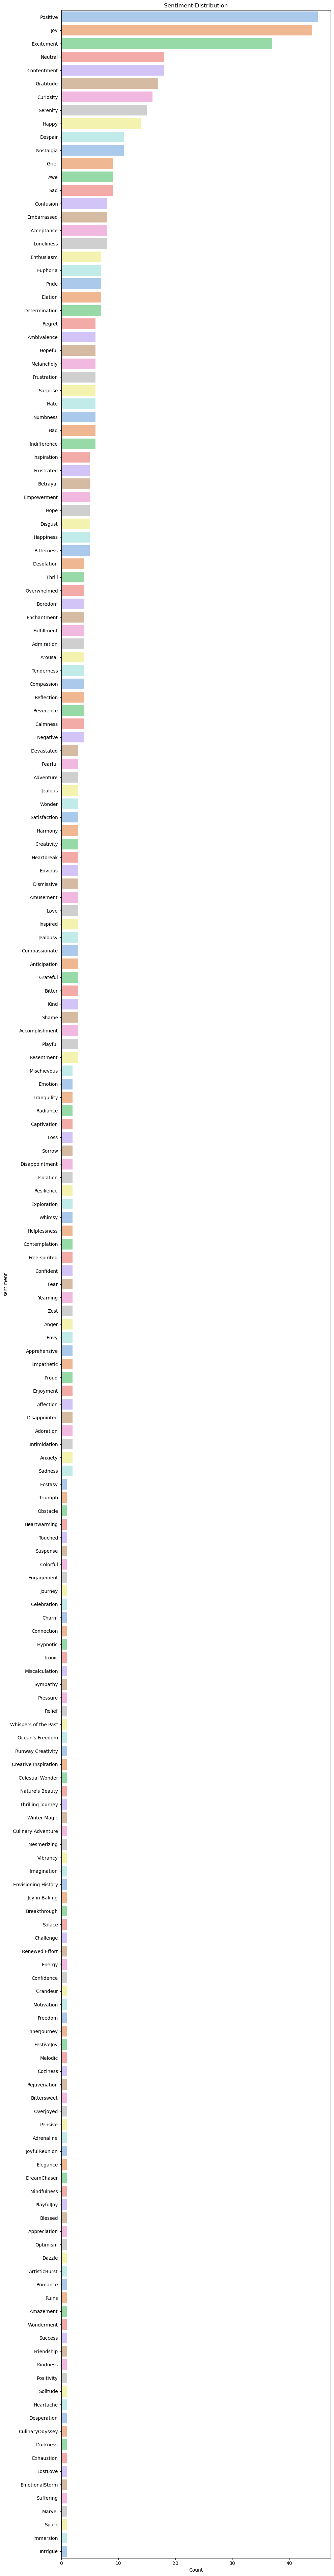

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, len(df['sentiment'].unique()) * 0.4))  # dynamic height
sns.countplot(data=df, y='sentiment', order=df['sentiment'].value_counts().index, palette='pastel')
plt.title('Sentiment Distribution')
plt.xlabel('Count')
plt.ylabel('sentiment')
plt.tight_layout()
plt.show()



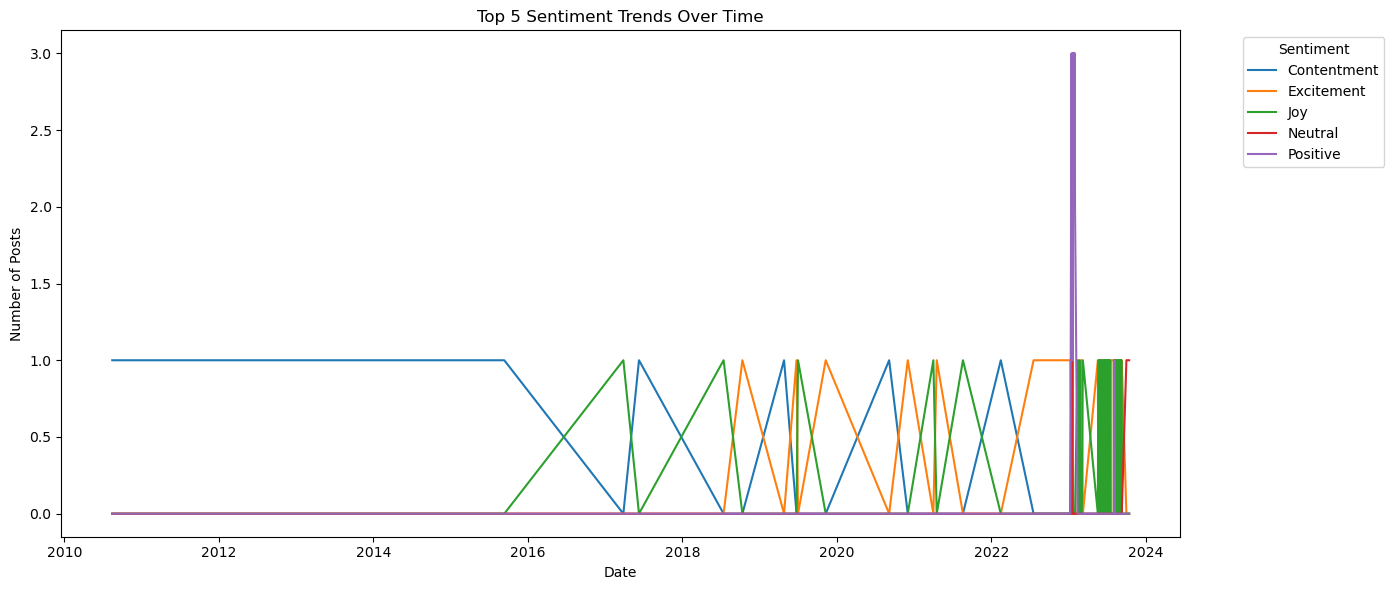

In [41]:
import matplotlib.pyplot as plt

# Get top 5 most frequent sentiments
top_sentiments = df['sentiment'].value_counts().head(5).index

# Filter the data to include only top sentiments
daily_sentiment = df[df['sentiment'].isin(top_sentiments)].groupby(['date', 'sentiment']).size().unstack().fillna(0)

# Plot
daily_sentiment.plot(figsize=(12, 6), title='Top 5 Sentiment Trends Over Time')
plt.ylabel('Number of Posts')
plt.xlabel('Date')
plt.tight_layout()
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')  # move legend outside
plt.show()




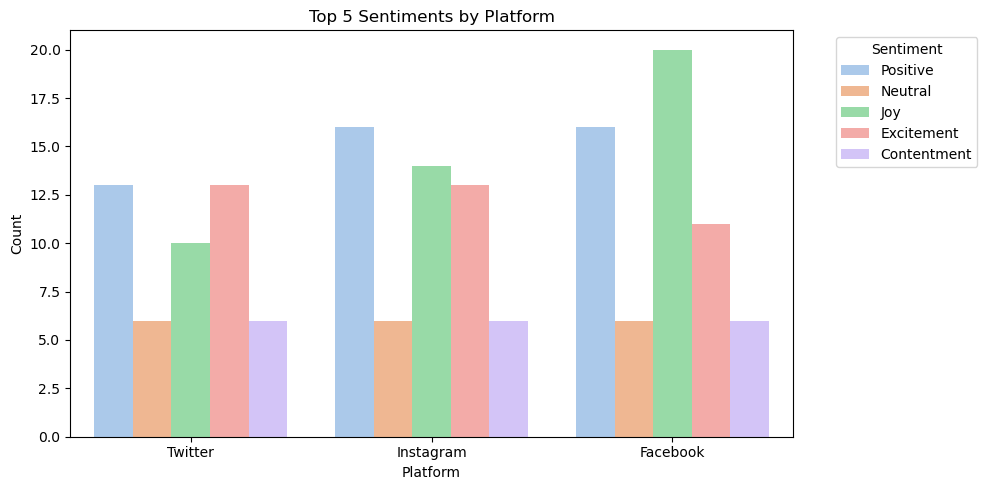

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 5 most frequent sentiments
top_sentiments = df['sentiment'].value_counts().head(5).index

# Filter dataset to include only these sentiments
filtered_df = df[df['sentiment'].isin(top_sentiments)]

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(data=filtered_df, x='platform', hue='sentiment', palette='pastel')
plt.title('Top 5 Sentiments by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')  # move legend outside the plot
plt.tight_layout()
plt.show()


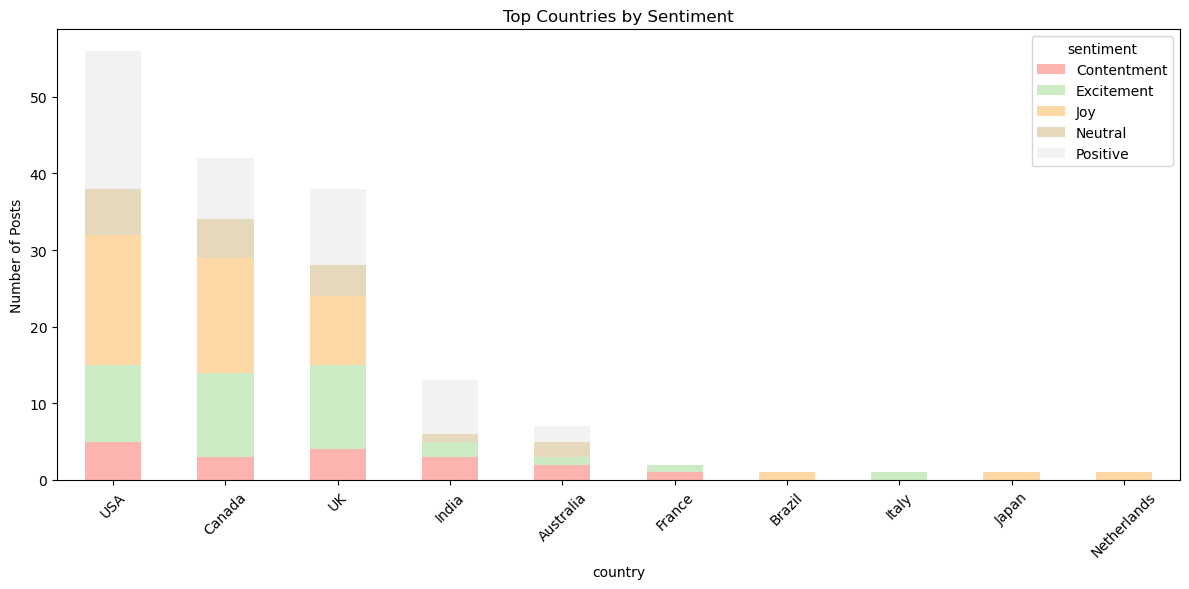

In [43]:
# Get top 5 most frequent sentiments
top_sentiments = df['sentiment'].value_counts().head(5).index

# Filter dataset to include only these sentiments
df2 = df[df['sentiment'].isin(top_sentiments)]
country_sentiment = df2.groupby(['country', 'sentiment']).size().unstack().fillna(0)
top_countries = country_sentiment.sum(axis=1).sort_values(ascending=False).head(10)

country_sentiment.loc[top_countries.index].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Pastel1')
plt.title('Top Countries by Sentiment')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


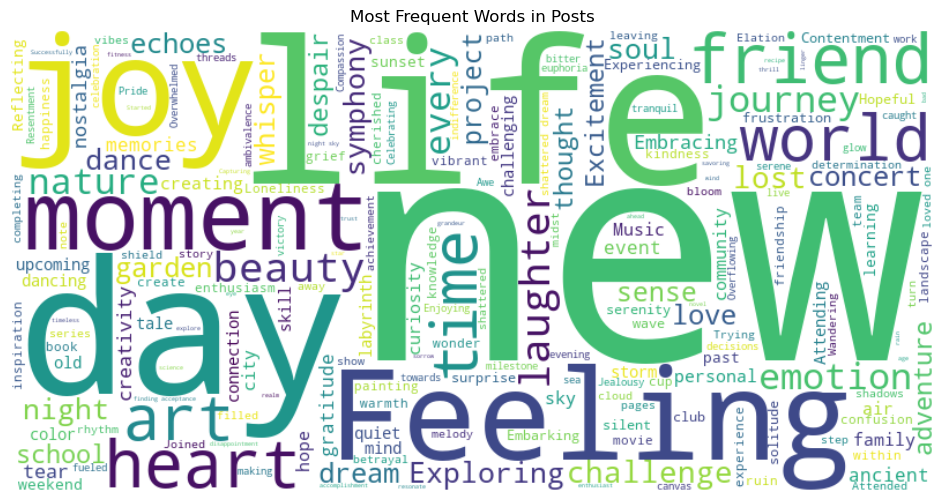

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text entries
all_text = ' '.join(df['text'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Posts')
plt.show()
# & "c:\Users\PC\anaconda3\python.exe"-m pip install wordcloud


In [45]:
user_sentiment = df.groupby(['user', 'sentiment']).size().unstack().fillna(0)
top_users = user_sentiment.sum(axis=1).sort_values(ascending=False).head(10)
user_sentiment.loc[top_users.index]




sentiment,Acceptance,Accomplishment,Admiration,Adoration,Adrenaline,Adventure,Affection,Amazement,Ambivalence,Amusement,...,Tranquility,Triumph,Vibrancy,Whimsy,Whispers of the Past,Winter Magic,Wonder,Wonderment,Yearning,Zest
user,,,,,,,,,,,,,,,,,,,,,
NatureAdmirer,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bookworm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FitnessAchiever,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ArtExplorer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WindWhisperer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DreamChaser,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CosmosExplorer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
TurbulentShield,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GardenEnthusiast,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
duplicates = df[df.duplicated(subset='text', keep=False)].sort_values('text')
print("Number of duplicates:", len(duplicates))
duplicates[['text', 'sentiment', 'platform']].head()


Number of duplicates: 8


,text,sentiment,platform
264,"A compassionate rain, tears of empathy fallin...",Compassionate,Facebook
278,"A compassionate rain, tears of empathy fallin...",Compassionate,Instagram
317,"Dismissive gestures, a curtain drawn to shiel...",Dismissive,Instagram
329,"Dismissive gestures, a curtain drawn to shiel...",Dismissive,Instagram
266,"Embraced by the hopeful dawn, a gardener sowi...",Hopeful,Instagram
